In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

In [40]:
df = pd.read_csv('Data/Surveillance.csv')
df

,A01,A02,A03,A04,A05,A06,A07,Categories
0,+,+,+,+,+,-,-,PUS
1,+,+,-,+,+,-,-,PUS
2,+,+,+,+,-,+,-,PUS
3,+,+,-,+,-,+,-,PUS
4,+,-,-,-,-,-,+,PUS
5,+,+,+,-,-,-,+,PUS
6,+,+,-,-,-,-,+,PUS
7,+,+,+,+,-,-,-,PUS
8,+,-,-,+,+,-,-,PIM
9,-,+,-,+,+,-,-,PIM


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   A01         14 non-null     object
 1   A02         14 non-null     object
 2   A03         14 non-null     object
 3   A04         14 non-null     object
 4   A05         14 non-null     object
 5   A06         14 non-null     object
 6   A07         14 non-null     object
 7   Categories  14 non-null     object
dtypes: object(8)
memory usage: 1.0+ KB


In [42]:
df.shape

(14, 8)

In [43]:
df =  df.replace("+",1)
df

,A01,A02,A03,A04,A05,A06,A07,Categories
0,1,1,1,1,1,-,-,PUS
1,1,1,-,1,1,-,-,PUS
2,1,1,1,1,-,1,-,PUS
3,1,1,-,1,-,1,-,PUS
4,1,-,-,-,-,-,1,PUS
5,1,1,1,-,-,-,1,PUS
6,1,1,-,-,-,-,1,PUS
7,1,1,1,1,-,-,-,PUS
8,1,-,-,1,1,-,-,PIM
9,-,1,-,1,1,-,-,PIM


In [44]:
df = df.replace("-",0)
df

,A01,A02,A03,A04,A05,A06,A07,Categories
0,1,1,1,1,1,0,0,PUS
1,1,1,0,1,1,0,0,PUS
2,1,1,1,1,0,1,0,PUS
3,1,1,0,1,0,1,0,PUS
4,1,0,0,0,0,0,1,PUS
5,1,1,1,0,0,0,1,PUS
6,1,1,0,0,0,0,1,PUS
7,1,1,1,1,0,0,0,PUS
8,1,0,0,1,1,0,0,PIM
9,0,1,0,1,1,0,0,PIM


In [45]:
PUS_data = df.loc[:7]
PUS_data

,A01,A02,A03,A04,A05,A06,A07,Categories
0,1,1,1,1,1,0,0,PUS
1,1,1,0,1,1,0,0,PUS
2,1,1,1,1,0,1,0,PUS
3,1,1,0,1,0,1,0,PUS
4,1,0,0,0,0,0,1,PUS
5,1,1,1,0,0,0,1,PUS
6,1,1,0,0,0,0,1,PUS
7,1,1,1,1,0,0,0,PUS


In [46]:
PUS_data = PUS_data.drop('Categories',axis=1)
PUS_data

,A01,A02,A03,A04,A05,A06,A07
0,1,1,1,1,1,0,0
1,1,1,0,1,1,0,0
2,1,1,1,1,0,1,0
3,1,1,0,1,0,1,0
4,1,0,0,0,0,0,1
5,1,1,1,0,0,0,1
6,1,1,0,0,0,0,1
7,1,1,1,1,0,0,0


In [47]:
from mlxtend.frequent_patterns import association_rules, apriori

In [48]:
frequent_itemset = apriori(PUS_data, min_support=0.6,use_colnames=True)
rules = association_rules(frequent_itemset,metric='support',min_threshold=0.6)
frequent_itemset['length'] = frequent_itemset['itemsets'].apply(lambda x: len(x))
rules

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(A01),(A02),1.000,0.875,0.875,0.875000,1.000000,0.000000,1.0000,0.000000
1,(A02),(A01),0.875,1.000,0.875,1.000000,1.000000,0.000000,inf,0.000000
2,(A01),(A04),1.000,0.625,0.625,0.625000,1.000000,0.000000,1.0000,0.000000
3,(A04),(A01),0.625,1.000,0.625,1.000000,1.000000,0.000000,inf,0.000000
4,(A04),(A02),0.625,0.875,0.625,1.000000,1.142857,0.078125,inf,0.333333
5,(A02),(A04),0.875,0.625,0.625,0.714286,1.142857,0.078125,1.3125,1.000000
6,"(A01, A04)",(A02),0.625,0.875,0.625,1.000000,1.142857,0.078125,inf,0.333333
7,"(A01, A02)",(A04),0.875,0.625,0.625,0.714286,1.142857,0.078125,1.3125,1.000000
8,"(A04, A02)",(A01),0.625,1.000,0.625,1.000000,1.000000,0.000000,inf,0.000000
9,(A01),"(A04, A02)",1.000,0.625,0.625,0.625000,1.000000,0.000000,1.0000,0.000000


In [49]:
rules['antecedents_len'] = rules['antecedents'].apply(lambda x: len(x))
rules['consequents_len'] = rules['consequents'].apply(lambda x: len(x))
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedents_len,consequents_len
0,(A01),(A02),1.000,0.875,0.875,0.875000,1.000000,0.000000,1.0000,0.000000,1,1
1,(A02),(A01),0.875,1.000,0.875,1.000000,1.000000,0.000000,inf,0.000000,1,1
2,(A01),(A04),1.000,0.625,0.625,0.625000,1.000000,0.000000,1.0000,0.000000,1,1
3,(A04),(A01),0.625,1.000,0.625,1.000000,1.000000,0.000000,inf,0.000000,1,1
4,(A04),(A02),0.625,0.875,0.625,1.000000,1.142857,0.078125,inf,0.333333,1,1
5,(A02),(A04),0.875,0.625,0.625,0.714286,1.142857,0.078125,1.3125,1.000000,1,1
6,"(A01, A04)",(A02),0.625,0.875,0.625,1.000000,1.142857,0.078125,inf,0.333333,2,1
7,"(A01, A02)",(A04),0.875,0.625,0.625,0.714286,1.142857,0.078125,1.3125,1.000000,2,1
8,"(A04, A02)",(A01),0.625,1.000,0.625,1.000000,1.000000,0.000000,inf,0.000000,2,1
9,(A01),"(A04, A02)",1.000,0.625,0.625,0.625000,1.000000,0.000000,1.0000,0.000000,1,2


In [50]:
C3 = rules[(rules['antecedents_len'] ==2) | (rules['consequents_len']==2)]
C3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedents_len,consequents_len
6,"(A01, A04)",(A02),0.625,0.875,0.625,1.000000,1.142857,0.078125,inf,0.333333,2,1
7,"(A01, A02)",(A04),0.875,0.625,0.625,0.714286,1.142857,0.078125,1.3125,1.000000,2,1
8,"(A04, A02)",(A01),0.625,1.000,0.625,1.000000,1.000000,0.000000,inf,0.000000,2,1
9,(A01),"(A04, A02)",1.000,0.625,0.625,0.625000,1.000000,0.000000,1.0000,0.000000,1,2
10,(A04),"(A01, A02)",0.625,0.875,0.625,1.000000,1.142857,0.078125,inf,0.333333,1,2
11,(A02),"(A01, A04)",0.875,0.625,0.625,0.714286,1.142857,0.078125,1.3125,1.000000,1,2


In [51]:
C3 =  C3.sort_values(by=['antecedents_len','confidence'],ascending=True)
C3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedents_len,consequents_len
9,(A01),"(A04, A02)",1.000,0.625,0.625,0.625000,1.000000,0.000000,1.0000,0.000000,1,2
11,(A02),"(A01, A04)",0.875,0.625,0.625,0.714286,1.142857,0.078125,1.3125,1.000000,1,2
10,(A04),"(A01, A02)",0.625,0.875,0.625,1.000000,1.142857,0.078125,inf,0.333333,1,2
7,"(A01, A02)",(A04),0.875,0.625,0.625,0.714286,1.142857,0.078125,1.3125,1.000000,2,1
6,"(A01, A04)",(A02),0.625,0.875,0.625,1.000000,1.142857,0.078125,inf,0.333333,2,1
8,"(A04, A02)",(A01),0.625,1.000,0.625,1.000000,1.000000,0.000000,inf,0.000000,2,1


In [52]:
frequent_itemset

,support,itemsets,length
0,1.000,(A01),1
1,0.875,(A02),1
2,0.625,(A04),1
3,0.875,"(A01, A02)",2
4,0.625,"(A01, A04)",2
5,0.625,"(A04, A02)",2
6,0.625,"(A01, A04, A02)",3


In [53]:
Cases = ['Case 1','Case 2','Case 3','Case 4','Case 5','Case 6']
Cases
C3['Cases'] = Cases


In [54]:
C3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedents_len,consequents_len,Cases
9,(A01),"(A04, A02)",1.000,0.625,0.625,0.625000,1.000000,0.000000,1.0000,0.000000,1,2,Case 1
11,(A02),"(A01, A04)",0.875,0.625,0.625,0.714286,1.142857,0.078125,1.3125,1.000000,1,2,Case 2
10,(A04),"(A01, A02)",0.625,0.875,0.625,1.000000,1.142857,0.078125,inf,0.333333,1,2,Case 3
7,"(A01, A02)",(A04),0.875,0.625,0.625,0.714286,1.142857,0.078125,1.3125,1.000000,2,1,Case 4
6,"(A01, A04)",(A02),0.625,0.875,0.625,1.000000,1.142857,0.078125,inf,0.333333,2,1,Case 5
8,"(A04, A02)",(A01),0.625,1.000,0.625,1.000000,1.000000,0.000000,inf,0.000000,2,1,Case 6


In [55]:
C3['support'] = (C3['support'] * 100).astype(float)
C3['confidence'] = (C3['confidence'] * 100).astype(float)

In [56]:
C3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedents_len,consequents_len,Cases
9,(A01),"(A04, A02)",1.000,0.625,62.5,62.500000,1.000000,0.000000,1.0000,0.000000,1,2,Case 1
11,(A02),"(A01, A04)",0.875,0.625,62.5,71.428571,1.142857,0.078125,1.3125,1.000000,1,2,Case 2
10,(A04),"(A01, A02)",0.625,0.875,62.5,100.000000,1.142857,0.078125,inf,0.333333,1,2,Case 3
7,"(A01, A02)",(A04),0.875,0.625,62.5,71.428571,1.142857,0.078125,1.3125,1.000000,2,1,Case 4
6,"(A01, A04)",(A02),0.625,0.875,62.5,100.000000,1.142857,0.078125,inf,0.333333,2,1,Case 5
8,"(A04, A02)",(A01),0.625,1.000,62.5,100.000000,1.000000,0.000000,inf,0.000000,2,1,Case 6


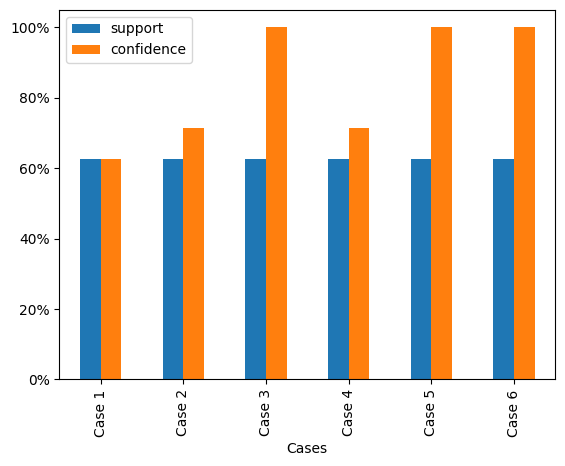

In [57]:
c3x = C3.plot(x='Cases',y=['support','confidence'],kind='bar')
c3x.yaxis.set_major_formatter(mtick.PercentFormatter())